<h1><center> Lecture 1 Pandas notebook </center></h1>

In this notebook you will see Pandas. The main purpose of using this notebook is simply to confirm that you can run it and understand what it is doing without difficulty. 

**Questions** are in bold. These are not mandatory or graded, they are simply to encourage you to think how you could answer them.

Contacts are in the first point the TAs:

Cristian Rodriguez Rivero: c.m.rodriguezrivero@uva.nl

Sara Mahdavi Hezavehi: s.mahdavihezavehi@uva.nl 

Reshmi Gopalakrishna Pillai: r.gopalakrishnapillai@uva.nl 

Tom van Sonsbeek: t.j.vansonsbeek@uva.nl 

Jia-Hong Huang: j.huang@uva.nl

or in the second point, the course coordinator

Andrew Brown: a.g.brown@uva.nl

In [1]:
import numpy as np
import pandas as pd

<h1><center> Series </center></h1>

In [2]:
integer_numpy_array = np.arange(20,25)
pandas_series = pd.Series(integer_numpy_array)
pandas_series

0    20
1    21
2    22
3    23
4    24
dtype: int32

In [3]:
list_of_strings = ["don't", "throw", "it", "out", "the", "window"]
pandas_series = pd.Series(list_of_strings)

**Q: Can you make a dataframe from a Python Dict?**

**A**

In [15]:
dicti = {'apple': 'red', 'orange': 'orange', 'mango': 'yellow', 'grape':'purple'}
#print(dicti)
df = pd.DataFrame.from_dict(dicti, orient='index', columns=['color'])
print(df)

         color
apple      red
orange  orange
mango   yellow
grape   purple


<h1><center> Dataframes </center></h1>

In [4]:
dataframe = pd.read_csv("NL_vacancies_2019.csv", sep=";", index_col='ID')
dataframe.head()

,SIC2008PrivateFirmsGovernment,Periods,VacanciesSeasonallyAdjusted_1
ID,,,
1806,part,1997KW01,73.8
1807,part,1997KW02,74.9
1808,part,1997KW03,96.5
1809,part,1997KW04,113.0
1810,part,1998KW01,115.6


**Q: Have a look around on the CBS website. What other statistics interest you? https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS**

**A**

Salary

https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=84163ENG&_theme=1059

<h1><center> Data Manipulation </center></h1>

In [5]:
dataframe.rename(columns={'SIC2008PrivateFirmsGovernment':'EmployerType',
                          'Periods':'Date',
                          'VacanciesSeasonallyAdjusted_1':'Vacancies'}, inplace=True)
dataframe['Date'] = pd.to_datetime(dataframe['Date'].str.replace('KW0', 'Q'))
dataframe['EmployerType'] = dataframe['EmployerType'].str.replace("ovh","Government")
dataframe['EmployerType'] = dataframe['EmployerType'].str.replace("part","Private")
dataframe.tail()

,EmployerType,Date,Vacancies
ID,,,
1981,Government,2018-04-01,18.8
1982,Government,2018-07-01,19.1
1983,Government,2018-10-01,20.1
1984,Government,2019-01-01,20.6
1985,Government,2019-04-01,22.5


**Q: How do you print the entire dataframe, not just .head() or .tail()?**

**A**

In [16]:
print(dataframe)

       EmployerType       Date  Vacancies
ID                                       
1806      Private   1997-01-01       73.8
1807      Private   1997-04-01       74.9
1808      Private   1997-07-01       96.5
1809      Private   1997-10-01      113.0
1810      Private   1998-01-01      115.6
...             ...        ...        ...
1981  Government    2018-04-01       18.8
1982  Government    2018-07-01       19.1
1983  Government    2018-10-01       20.1
1984  Government    2019-01-01       20.6
1985  Government    2019-04-01       22.5

[180 rows x 3 columns]


<h1><center> Plotting </center></h1>

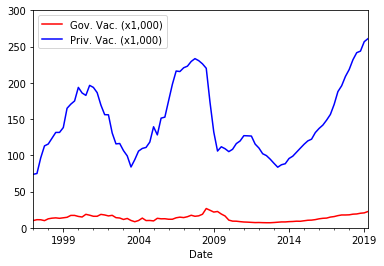

In [6]:
%matplotlib inline

df_gov = dataframe[dataframe['EmployerType'].str.match('Government')]
df_priv = dataframe[dataframe['EmployerType'].str.match('Private')]
ax = df_gov.plot('Date','Vacancies',color='red',title='',label = 'Gov. Vac. (x1,000)')
ax = df_priv.plot('Date','Vacancies',color='blue',title='', label = 'Priv. Vac. (x1,000)', ax=ax)
ylims = ax.set_ylim(0,300)

**Q: Can you plot only a subset of this data - say between 2000 and 2010? (NOT using ax.set_xlim )**

**A**

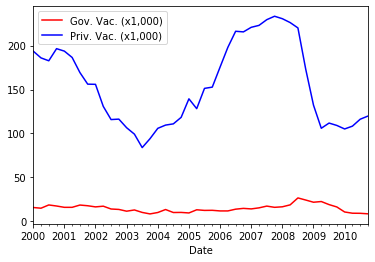

In [25]:
df_gov_subset = df_gov[(df_gov.Date >= '2000-01-01') & (df_gov.Date <= '2010-12-31')]
df_priv_subset = df_priv[(df_priv.Date >= '2000-01-01') & (df_priv.Date <= '2010-12-31')]

ax = df_gov_subset.plot('Date','Vacancies',color='red',title='',label = 'Gov. Vac. (x1,000)')
ax = df_priv_subset.plot('Date','Vacancies',color='blue',title='', label = 'Priv. Vac. (x1,000)', ax=ax)


<h1><center> join/concat/merge </center></h1>

In [7]:
df_gov = df_gov[["Date","EmployerType","Vacancies"]] 
df_combined = pd.merge(df_gov,df_priv,how='outer', on='Date')
df_combined['AllVacancies'] = df_combined['Vacancies_x'] + df_combined['Vacancies_y']
df_combined.head()

,Date,EmployerType_x,Vacancies_x,EmployerType_y,Vacancies_y,AllVacancies
0,1997-01-01,Government,10.0,Private,73.8,83.8
1,1997-04-01,Government,11.2,Private,74.9,86.1
2,1997-07-01,Government,11.1,Private,96.5,107.6
3,1997-10-01,Government,9.9,Private,113.0,122.9
4,1998-01-01,Government,12.4,Private,115.6,128.0


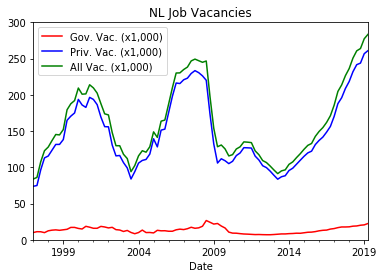

In [8]:
ax = df_gov.plot('Date','Vacancies',color='red',title='',label = 'Gov. Vac. (x1,000)')
ax = df_priv.plot('Date','Vacancies',color='blue',title='', label = 'Priv. Vac. (x1,000)', ax=ax)
ax = df_combined.plot('Date','AllVacancies',color='green',title='NL Job Vacancies',label ='All Vac. (x1,000)', ax=ax)
ylims = ax.set_ylim(0,300)

**Q: How would you combine the two dataframes df_gov and df_priv to recover the original, combined dataframe?**

**A**

Question is not that clear to me, combining dataframes can be done using pd.merge as shown above.

<h1><center> Data in, data out </center></h1>

In [9]:
df_combined.to_excel('NL_job_vacancies_2019.xlsx')

**Q: Can you open this .xlsx file, change something, save the file, then reload the changes into Pandas?** 

**A**

You can use read excel: 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html